In [10]:
import numpy as np
import cv2
from scipy.misc import imread
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.core.debugger import Tracer
import warnings
from jupyterthemes import jtplot

In [13]:
%matplotlib inline
jtplot.style()
sns.set_context("poster")
# plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

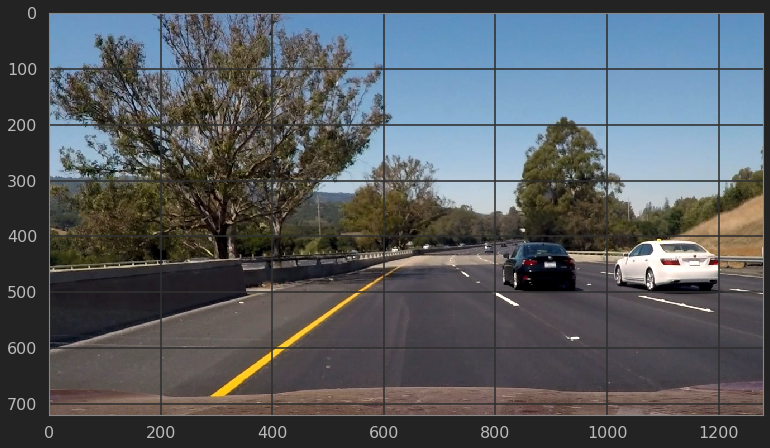

In [24]:
image = imread('../project_4/cnd-all/test_images/test6.jpg')
plt.imshow(image)

In [48]:
# Here is your draw_boxes function from the previous exercise
def draw_boxes(img, bboxes, color=(255, 0, 255), thick=2):
    # Make a copy of the image
    imcopy = np.copy(img)
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
    # Return the image copy with boxes drawn
    return imcopy

In [49]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    # Initialize a list to append window positions to
    window_list = []
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
    # Return the list of windows
    return window_list

394


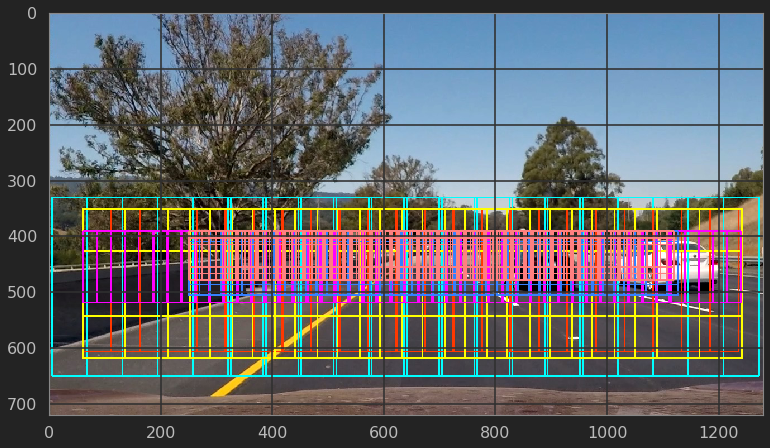

In [116]:
windows_xxlarge = slide_window(image,
                             x_start_stop=[5,1280], 
                             y_start_stop=[330,720], 
                             xy_window=(320, 320), 
                             xy_overlap=(0.8, 0.0))

windows_xlarge = slide_window(image,
                             x_start_stop=[60,1250], 
                             y_start_stop=[350,700], 
                             xy_window=(256, 256), 
                            xy_overlap=(0.8, 0.0))
windows_large = slide_window(image,
                             x_start_stop=[60,1250], 
                             y_start_stop=[350,620], 
                             xy_window=(192, 192), 
                             xy_overlap=(0.6, 0.6))
windows_medium = slide_window(image,
                             x_start_stop=[60,1250], 
                             y_start_stop=[390,540], 
                             xy_window=(128, 128), 
                             xy_overlap=(0.8, 0.8))
windows_small = slide_window(image,
                             x_start_stop=[250,1126], 
                             y_start_stop=[390,520], 
                             xy_window=(96, 96), 
                             xy_overlap=(0.8, 0.8))

windows_xsmall = slide_window(image,
                             x_start_stop=[250,1126], 
                             y_start_stop=[390,480], 
                             xy_window=(64, 64), 
                             xy_overlap=(0.8, 0.8))

boxed = draw_boxes(image, windows_xxlarge, color=(0,255,255))
boxed = draw_boxes(boxed, windows_xlarge, color=(255,56,0))
boxed = draw_boxes(boxed, windows_large, color=(255,256,0))
boxed = draw_boxes(boxed, windows_medium, color=(255,0,256))
boxed = draw_boxes(boxed, windows_small, color=(54,128,256))
boxed = draw_boxes(boxed, windows_xsmall, color=(256,128,128))

windows = np.concatenate([
    windows_xxlarge, windows_xlarge, windows_large, windows_medium,
    windows_small, windows_xsmall
])
plt.imshow(boxed)
print(len(windows))

In [117]:
%load_ext autoreload
%autoreload 2